# KMeansBinning: Feature Demonstration

This notebook demonstrates the key features of the `KMeansBinning` class from the binlearn library.

## Key Features Covered:
- Basic binning with different configurations
- Working with pandas DataFrames and numpy arrays
- Sklearn pipeline integration
- Parameter serialization and reconstruction
- Edge case handling

## Overview
`KMeansBinning` uses k-means clustering to create data-adaptive bins, making it ideal for:
- **Multi-modal distributions**
- **Data-driven bin boundaries**
- **Natural clustering patterns**
- **Complex distribution shapes**

## 1. Setup and Data Preparation

In [31]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from binlearn.methods import KMeansBinning, EqualWidthBinning, EqualFrequencyBinning
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [32]:
# Create sample datasets emphasizing KMeansBinning strengths
n_samples = 200

# 1. Pandas DataFrame with multi-modal distributions
# Create bimodal and trimodal distributions where k-means excels
data = pd.DataFrame({
    'bimodal': np.concatenate([
        np.random.normal(20, 5, n_samples//2),
        np.random.normal(80, 5, n_samples//2)
    ]),
    'trimodal': np.concatenate([
        np.random.normal(10, 3, n_samples//3),
        np.random.normal(50, 4, n_samples//3),
        np.random.normal(90, 3, n_samples//3 + n_samples%3)
    ]),
    'clustered': np.concatenate([
        np.random.normal(25, 2, n_samples//4),
        np.random.normal(40, 3, n_samples//4),
        np.random.normal(60, 2, n_samples//4),
        np.random.normal(85, 4, n_samples//4)
    ])
})

# 2. NumPy array with complex patterns
# Create data with natural clustering
cluster1 = np.random.multivariate_normal([10, 20], [[4, 1], [1, 3]], n_samples//3)
cluster2 = np.random.multivariate_normal([30, 10], [[3, -1], [-1, 4]], n_samples//3)
cluster3 = np.random.multivariate_normal([20, 40], [[5, 2], [2, 6]], n_samples//3 + n_samples%3)
array_data = np.vstack([cluster1, cluster2, cluster3])

# 3. Classification dataset for pipeline demo
X_class, y_class = make_classification(
    n_samples=n_samples, 
    n_features=3, 
    n_informative=2, 
    n_redundant=1, 
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,  # Create natural clusters
    random_state=42
)
X_features = pd.DataFrame(X_class, columns=['feature_1', 'feature_2', 'feature_3'])

print(f"📊 Created datasets:")
print(f"   - Multi-modal data: {data.shape}")
print(f"   - Clustered array: {array_data.shape}")
print(f"   - Classification: {X_features.shape}")
print("\n📈 Data preview (note multi-modal patterns):")
print(data.describe().round(2))
print("\n📊 Distribution characteristics:")
for col in data.columns:
    print(f"   {col}: Multi-modal with distinct peaks")

📊 Created datasets:
   - Multi-modal data: (200, 3)
   - Clustered array: (200, 2)
   - Classification: (200, 3)

📈 Data preview (note multi-modal patterns):
       bimodal  trimodal  clustered
count   200.00    200.00     200.00
mean     49.80     50.71      52.33
std      30.74     32.97      22.78
min       6.90      0.28      20.87
25%      19.39     12.31      32.10
50%      49.83     50.66      52.15
75%      80.38     88.22      66.90
max      93.60     96.57      94.08

📊 Distribution characteristics:
   bimodal: Multi-modal with distinct peaks
   trimodal: Multi-modal with distinct peaks
   clustered: Multi-modal with distinct peaks


## 2. Basic Binning Operations

In [33]:
# Basic usage with different bin counts
print("🎯 Basic KMeansBinning Demonstration")
print("=" * 35)

# Test with different bin configurations
for n_bins in [3, 5, 7]:
    print(f"\n📊 Using {n_bins} bins:")
    
    # Create and fit binner
    binner = KMeansBinning(n_bins=n_bins)
    binner.fit(data[['bimodal', 'trimodal']])
    
    # Transform data
    binned = binner.transform(data[['bimodal', 'trimodal']])
    
    print(f"   Bin edges (bimodal): {np.round(binner.bin_edges_['bimodal'], 1)}")
    print(f"   Bin edges (trimodal): {np.round(binner.bin_edges_['trimodal'], 1)}")
    
    # Check cluster centers (if available)
    if hasattr(binner, 'cluster_centers_'):
        print(f"   Cluster centers found: {len(binner.cluster_centers_['bimodal'])}")
    
    print(f"   Unique bins created: {len(np.unique(binned))}")

# Demonstrate with numpy arrays
print(f"\n🔢 NumPy Array Support:")
binner_array = KMeansBinning(n_bins=4)
binner_array.fit(array_data)
binned_array = binner_array.transform(array_data)
print(f"   Array shape: {array_data.shape} → {binned_array.shape}")
print(f"   Unique values: {len(np.unique(binned_array))}")
print(f"   Data-adaptive binning based on natural clusters")

🎯 Basic KMeansBinning Demonstration

📊 Using 3 bins:
   Bin edges (bimodal): [ 6.9 47.5 79.4 93.6]
   Bin edges (trimodal): [ 0.3 30.4 70.4 96.6]
   Unique bins created: 3

📊 Using 5 bins:
   Bin edges (bimodal): [ 6.9 19.6 49.  78.2 85.1 93.6]
   Bin edges (trimodal): [ 0.3 10.  30.3 50.7 71.8 96.6]
   Unique bins created: 5

📊 Using 7 bins:
   Bin edges (bimodal): [ 6.9 15.1 19.5 23.6 50.4 78.2 85.1 93.6]
   Bin edges (trimodal): [ 0.3  9.5 14.6 32.6 50.7 70.8 90.4 96.6]
   Unique bins created: 7

🔢 NumPy Array Support:
   Array shape: (200, 2) → (200, 2)
   Unique values: 4
   Data-adaptive binning based on natural clusters


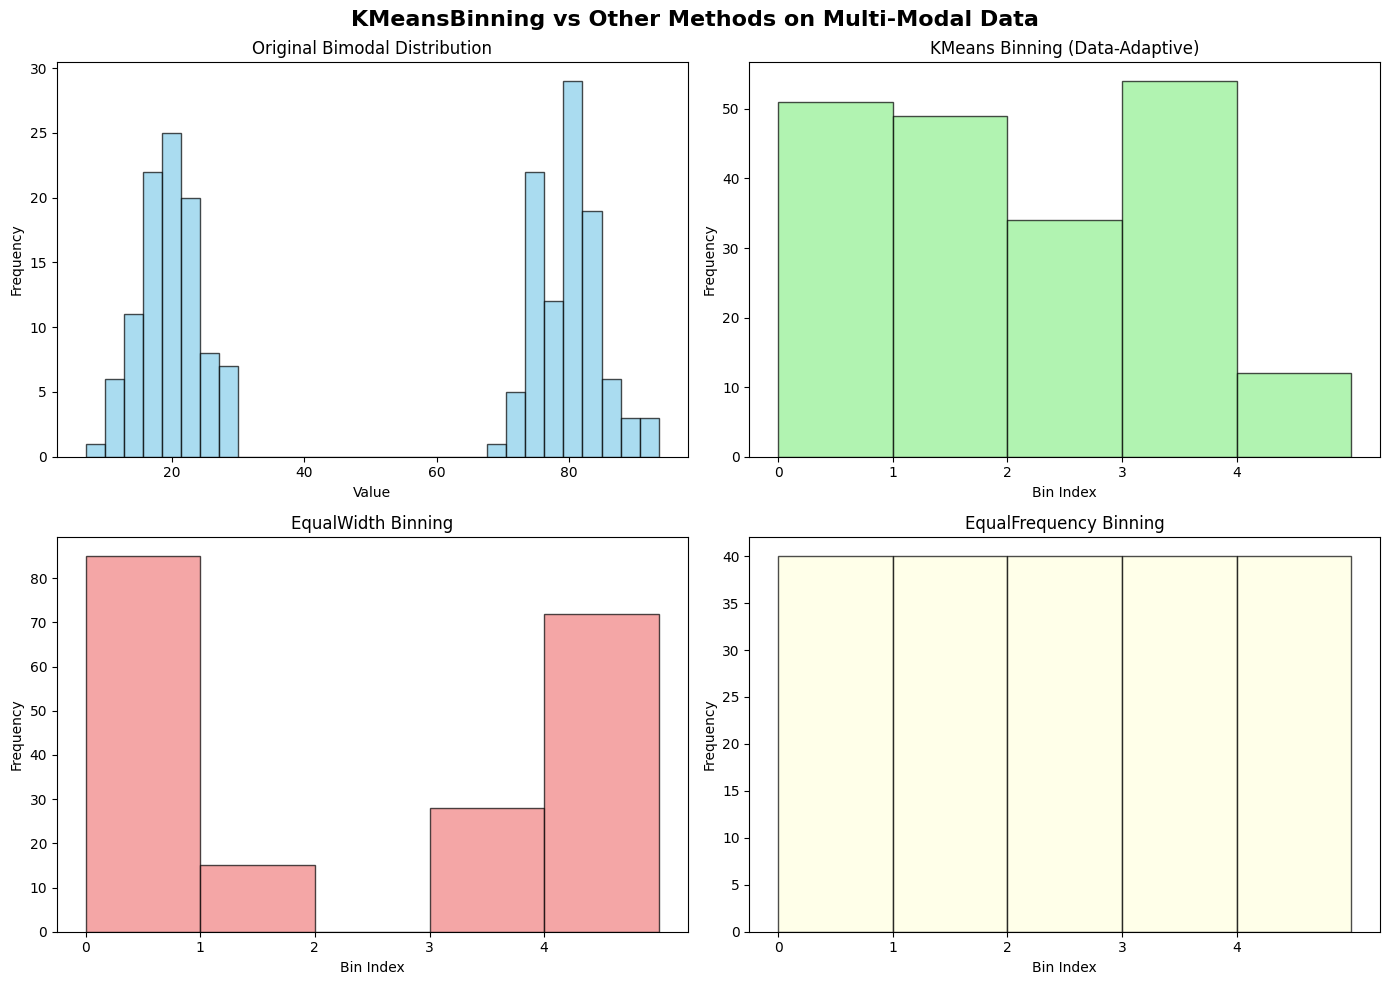


📊 Frequency distribution comparison:
KMeans:        [51 49 34 54 12] (std: 15.6)
EqualWidth:    [85 15 28 72] (std: 29.2)
EqualFreq:     [40 40 40 40 40] (std: 0.0)

💡 KMeans adapts to natural data clusters!


In [34]:
# Visualize binning results and compare with other methods
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('KMeansBinning vs Other Methods on Multi-Modal Data', fontsize=16, fontweight='bold')

# Original data
axes[0, 0].hist(data['bimodal'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Original Bimodal Distribution')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')

# KMeans binning
kmeans_binner = KMeansBinning(n_bins=5)
kmeans_binner.fit(data[['bimodal']])
kmeans_binned = kmeans_binner.transform(data[['bimodal']])

axes[0, 1].hist(kmeans_binned[:, 0], bins=range(6), alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('KMeans Binning (Data-Adaptive)')
axes[0, 1].set_xlabel('Bin Index')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xticks(range(5))

# EqualWidth comparison
width_binner = EqualWidthBinning(n_bins=5)
width_binner.fit(data[['bimodal']])
width_binned = width_binner.transform(data[['bimodal']])

axes[1, 0].hist(width_binned[:, 0], bins=range(6), alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('EqualWidth Binning')
axes[1, 0].set_xlabel('Bin Index')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(range(5))

# EqualFrequency comparison
freq_binner = EqualFrequencyBinning(n_bins=5)
freq_binner.fit(data[['bimodal']])
freq_binned = freq_binner.transform(data[['bimodal']])

axes[1, 1].hist(freq_binned[:, 0], bins=range(6), alpha=0.7, color='lightyellow', edgecolor='black')
axes[1, 1].set_title('EqualFrequency Binning')
axes[1, 1].set_xlabel('Bin Index')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xticks(range(5))

plt.tight_layout()
plt.show()

# Compare frequency distributions
print("\n📊 Frequency distribution comparison:")
kmeans_unique, kmeans_counts = np.unique(kmeans_binned[:, 0], return_counts=True)
width_unique, width_counts = np.unique(width_binned[:, 0], return_counts=True)
freq_unique, freq_counts = np.unique(freq_binned[:, 0], return_counts=True)

print(f"KMeans:        {kmeans_counts} (std: {np.std(kmeans_counts):.1f})")
print(f"EqualWidth:    {width_counts} (std: {np.std(width_counts):.1f})")
print(f"EqualFreq:     {freq_counts} (std: {np.std(freq_counts):.1f})")
print(f"\n💡 KMeans adapts to natural data clusters!")

## 3. Sklearn Pipeline Integration

In [35]:
# Demonstrate pipeline integration
print("🔗 Sklearn Pipeline Integration")
print("=" * 35)

# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_class, test_size=0.3, random_state=42
)

# Create pipeline with binning and classification
pipeline = Pipeline([
    ('binner', KMeansBinning(n_bins=5)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = (y_pred == y_test).mean()

print(f"✅ Pipeline trained successfully")
print(f"📊 Test accuracy: {accuracy:.3f}")
print(f"🔢 Features binned: {X_train.shape[1]}")

# Show bin edges from pipeline
binner_from_pipeline = pipeline.named_steps['binner']
print(f"\n📏 Adaptive bin edges created:")
for i, (col, edges) in enumerate(binner_from_pipeline.bin_edges_.items()):
    print(f"   {col}: {np.round(edges, 2)}")

# Compare with other binning methods in pipelines
print(f"\n⚖️ Pipeline comparison:")

# EqualWidth pipeline
pipeline_width = Pipeline([
    ('binner', EqualWidthBinning(n_bins=5)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])
pipeline_width.fit(X_train, y_train)
accuracy_width = (pipeline_width.predict(X_test) == y_test).mean()

# EqualFrequency pipeline
pipeline_freq = Pipeline([
    ('binner', EqualFrequencyBinning(n_bins=5)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])
pipeline_freq.fit(X_train, y_train)
accuracy_freq = (pipeline_freq.predict(X_test) == y_test).mean()

print(f"   KMeans:         {accuracy:.3f}")
print(f"   EqualWidth:     {accuracy_width:.3f}")
print(f"   EqualFrequency: {accuracy_freq:.3f}")
print(f"\n💡 Data-adaptive binning can improve model performance!")

🔗 Sklearn Pipeline Integration
✅ Pipeline trained successfully
📊 Test accuracy: 0.833
🔢 Features binned: 3

📏 Adaptive bin edges created:
   feature_1: [-2.9  -1.39 -0.27  0.68  1.56  2.92]
   feature_2: [-3.09 -1.57 -0.27  0.95  2.05  3.97]
   feature_3: [-3.01 -0.98 -0.33  0.31  0.98  1.59]

⚖️ Pipeline comparison:
   KMeans:         0.833
   EqualWidth:     0.817
   EqualFrequency: 0.750

💡 Data-adaptive binning can improve model performance!


## 4. Parameter Serialization and Reconstruction

In [36]:
# Demonstrate serialization for model persistence
print("💾 Parameter Serialization & Reconstruction")
print("=" * 45)

# Create and fit original binner
original_binner = KMeansBinning(n_bins=6)
original_binner.fit(data)
original_result = original_binner.transform(data)

# Serialize parameters
params = original_binner.get_params()
print(f"📋 Serialized parameters: {params}")

# Reconstruct binner from parameters
reconstructed_binner = KMeansBinning(**params)

# Test reconstruction
reconstructed_result = reconstructed_binner.transform(data)
results_match = np.allclose(original_result, reconstructed_result)

print(f"\n🔍 Reconstruction verification:")
print(f"   ✅ Results identical: {results_match}")
print(f"   📊 Original shape: {original_result.shape}")
print(f"   📊 Reconstructed shape: {reconstructed_result.shape}")

# Test with new multi-modal data
test_data = pd.DataFrame({
    'bimodal': np.concatenate([
        np.random.normal(15, 4, 25),
        np.random.normal(85, 6, 25)
    ]),
    'trimodal': np.concatenate([
        np.random.normal(5, 2, 17),
        np.random.normal(45, 3, 17),
        np.random.normal(95, 4, 16)
    ]),
    'clustered': np.concatenate([
        np.random.normal(20, 3, 13),
        np.random.normal(35, 2, 13),
        np.random.normal(55, 4, 12),
        np.random.normal(80, 5, 12)
    ])
})

test_result = reconstructed_binner.transform(test_data)
print(f"\n🔄 Transform new data without refitting:")
print(f"   ✅ Success: {test_result.shape}")
print(f"   🔢 Unique bins: {len(np.unique(test_result))}")
print(f"   🎯 Maintains learned cluster-based boundaries")

💾 Parameter Serialization & Reconstruction
📋 Serialized parameters: {'n_bins': 6, 'clip': True, 'preserve_dataframe': False, 'fit_jointly': False, 'bin_edges': {'bimodal': [6.901274479551278, 16.08830854602715, 22.23675690450358, 50.05307865398609, 78.18547269234803, 85.11662411453318, 93.6008458329481], 'trimodal': [0.2761979797927818, 9.988793892402898, 30.32727060232067, 50.73016371066075, 70.84892725733648, 90.39923814771862, 96.56940879965302], 'clustered': [20.865115799920247, 31.473269431869788, 40.80368104586291, 51.523058187803834, 70.75605828972184, 84.88364730576492, 94.08277143121758]}, 'bin_representatives': {'bimodal': [12.905961668385478, 19.270655423668824, 25.202858385338335, 74.90329892263385, 81.4676464620622, 88.76560176700414], 'trimodal': [7.267621538370842, 12.709966246434952, 47.94457495820639, 53.5157524631151, 88.18210205155788, 92.61637424387936], 'clustered': [24.902511681262656, 38.04402718247692, 43.5633349092489, 59.482781466358766, 82.02933511308491, 87.

## 5. Edge Cases and Robustness

In [37]:
# Test edge cases
print("⚠️ Edge Case Testing")
print("=" * 25)

edge_cases = {
    'Uniform data': np.random.uniform(0, 100, 100),  # No natural clusters
    'Single cluster': np.random.normal(50, 5, 100),   # One tight cluster
    'Many small clusters': np.concatenate([np.random.normal(i*10, 1, 10) for i in range(10)]),
    'Small dataset': np.concatenate([np.random.normal(20, 2, 5), np.random.normal(80, 3, 5)])
}

for case_name, case_data in edge_cases.items():
    print(f"\n🧪 Testing: {case_name}")
    try:
        df_case = pd.DataFrame({'values': case_data})
        binner = KMeansBinning(n_bins=5)
        binner.fit(df_case)
        result = binner.transform(df_case)
        
        unique_bins, counts = np.unique(result, return_counts=True)
        
        print(f"   ✅ Success: {result.shape}")
        print(f"   📊 Unique bins: {len(unique_bins)}")
        print(f"   📈 Frequencies: {counts} (std: {np.std(counts):.1f})")
        print(f"   📏 Range: [{case_data.min():.1f}, {case_data.max():.1f}]")
        
    except Exception as e:
        print(f"   ❌ Failed: {str(e)}")

# Test performance on different distribution types
print(f"\n📊 Distribution Adaptability Test:")
distributions = {
    'Bimodal': np.concatenate([np.random.normal(20, 5, 50), np.random.normal(80, 5, 50)]),
    'Trimodal': np.concatenate([np.random.normal(20, 3, 33), np.random.normal(50, 4, 34), np.random.normal(80, 3, 33)]),
    'Uniform': np.random.uniform(0, 100, 100),
    'Skewed': np.random.exponential(2, 100)
}

for dist_name, dist_data in distributions.items():
    df_dist = pd.DataFrame({'values': dist_data})
    
    # KMeans
    kmeans_binner = KMeansBinning(n_bins=5)
    kmeans_result = kmeans_binner.fit_transform(df_dist)
    kmeans_unique, kmeans_counts = np.unique(kmeans_result, return_counts=True)
    
    # EqualWidth for comparison
    width_binner = EqualWidthBinning(n_bins=5)
    width_result = width_binner.fit_transform(df_dist)
    width_unique, width_counts = np.unique(width_result, return_counts=True)
    
    print(f"\n{dist_name} distribution:")
    print(f"   KMeans:    {kmeans_counts} (std: {np.std(kmeans_counts):.1f})")
    print(f"   EqualWidth: {width_counts} (std: {np.std(width_counts):.1f})")
    
    if dist_name in ['Bimodal', 'Trimodal']:
        print(f"   💡 KMeans excels with multi-modal data!")
    elif dist_name == 'Uniform':
        print(f"   ⚖️ Similar performance for uniform data")

⚠️ Edge Case Testing

🧪 Testing: Uniform data
   ✅ Success: (100, 1)
   📊 Unique bins: 5
   📈 Frequencies: [13 19 21 28 19] (std: 4.8)
   📏 Range: [0.8, 98.8]

🧪 Testing: Single cluster
   ✅ Success: (100, 1)
   📊 Unique bins: 5
   📈 Frequencies: [ 6 23 32 25 14] (std: 9.1)
   📏 Range: [39.2, 62.5]

🧪 Testing: Many small clusters
   ✅ Success: (100, 1)
   📊 Unique bins: 5
   📈 Frequencies: [20 20 20 20 20] (std: 0.0)
   📏 Range: [-1.5, 92.1]

🧪 Testing: Small dataset
   ✅ Success: (10, 1)
   📊 Unique bins: 5
   📈 Frequencies: [4 1 2 2 1] (std: 1.1)
   📏 Range: [19.5, 83.5]

📊 Distribution Adaptability Test:

Bimodal distribution:
   KMeans:    [17 22 11 29 21] (std: 5.9)
   EqualWidth: [43  7  7 43] (std: 18.0)
   💡 KMeans excels with multi-modal data!

Trimodal distribution:
   KMeans:    [33 17 17 23 10] (std: 7.7)
   EqualWidth: [33  2 32 33] (std: 13.3)
   💡 KMeans excels with multi-modal data!

Uniform distribution:
   KMeans:    [18 20 17 21 24] (std: 2.4)
   EqualWidth: [18 20 1

## 6. Summary and Best Practices

In [38]:
# Summary and recommendations
print("📝 KMeansBinning Summary")
print("=" * 30)

recommendations = {
    "✅ Best for": [
        "Multi-modal distributions (bimodal, trimodal)",
        "Data with natural clustering patterns",
        "Complex distribution shapes",
        "When data-adaptive boundaries are preferred"
    ],
    "⚠️ Use with caution": [
        "Uniform distributions (no clear clusters)",
        "Very small datasets (insufficient for clustering)",
        "When reproducibility is critical (due to k-means randomness)"
    ],
    "💡 Tips": [
        "Set random_state for reproducible results",
        "Consider the number of natural clusters in your data",
        "Compare with equal-width/frequency for validation",
        "Use in sklearn pipelines for consistent preprocessing"
    ]
}

for category, items in recommendations.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  • {item}")

print(f"\n🎯 Key Features Demonstrated:")
features = [
    "Data-adaptive binning using k-means clustering",
    "Superior handling of multi-modal distributions",
    "Seamless sklearn pipeline integration",
    "Parameter serialization with cluster preservation",
    "Adaptability across different distribution types"
]

for i, feature in enumerate(features, 1):
    print(f"  {i}. {feature}")

print(f"\n🔍 When to Choose KMeansBinning:")
decision_points = [
    "✅ Your data has multiple peaks or natural clusters",
    "✅ You want boundaries that adapt to data structure",
    "✅ Standard binning methods don't capture data patterns",
    "❌ Your data is uniformly distributed",
    "❌ You need perfectly interpretable bin boundaries",
    "❌ Dataset is too small for meaningful clustering"
]

for point in decision_points:
    print(f"  {point}")

print(f"\n✨ KMeansBinning demonstration complete!")
print(f"🎯 Perfect for discovering natural data patterns through clustering!")

📝 KMeansBinning Summary

✅ Best for:
  • Multi-modal distributions (bimodal, trimodal)
  • Data with natural clustering patterns
  • Complex distribution shapes
  • When data-adaptive boundaries are preferred

⚠️ Use with caution:
  • Uniform distributions (no clear clusters)
  • Very small datasets (insufficient for clustering)
  • When reproducibility is critical (due to k-means randomness)

💡 Tips:
  • Set random_state for reproducible results
  • Consider the number of natural clusters in your data
  • Compare with equal-width/frequency for validation
  • Use in sklearn pipelines for consistent preprocessing

🎯 Key Features Demonstrated:
  1. Data-adaptive binning using k-means clustering
  2. Superior handling of multi-modal distributions
  3. Seamless sklearn pipeline integration
  4. Parameter serialization with cluster preservation
  5. Adaptability across different distribution types

🔍 When to Choose KMeansBinning:
  ✅ Your data has multiple peaks or natural clusters
  ✅ You 